<a href="https://colab.research.google.com/github/shitote/dist-repo/blob/main/neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with tensorflow.

A Classification problem is when you try to classify a class to be one thing or another.
A few types of classification problem:
* Binary classification.
* malticlass classification.
* Multylabel classification.

## The typical architecture of a neural network for classification problem.
1. imput layer shape
2. Hidden layes  - this ranges from one to infinity.
3. Neurals per hidden layer  - it is ussualy problem specific.
4. Out put layer - one class or the other.
5. Hidden activation - Usualy ReLU (rectified linear unit)
6. Output activation - sigmoid, softmax.
7. Loss function - Cross entropy.
8. Optimizer - SGD (stocastic gradient descent), Adam.

### Create the data to view and fit.

In [ ]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# Create circles.
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check the freatures
x[0]

array([0.75424625, 0.23148074])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({'x0': x[:, 0], 'x1': x[:, 1], 'label': y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


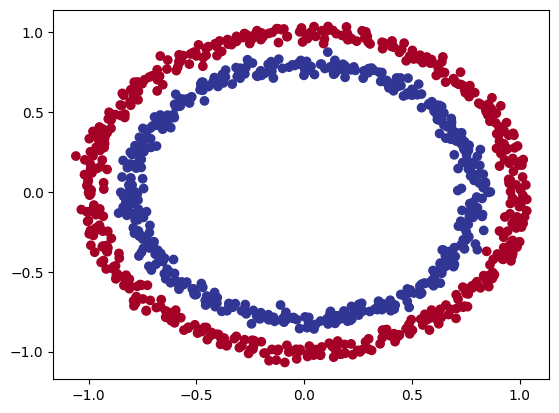

In [ ]:
 # Visualize with a plot
 import matplotlib.pyplot as plt
 plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Imput and the outut shape

In [ ]:
len(x), len(y)

(1000, 1000)

In [ ]:
# View the first example of feature and labels
x[11], y[11]

(array([0.5694666 , 0.84476776]), 0)

### Stemps in modeling

In [ ]:
# make the importation of tensorflow.
import tensorflow as tf

# Set the random see
tf.random.set_seed(42)

# Create a sequential mode.
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Time to comple our model_1.
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])
# Fit the model_1 with the training and the test data nin this case x and y.
model_1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 9ms/step - loss: 4.2118 - accuracy: 0.4760
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 3.5919 - accuracy: 0.4710
Epoch 3/5
32/32 [==============================] - 0s 8ms/step - loss: 0.7307 - accuracy: 0.4830
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7039 - accuracy: 0.4940
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.4990


In [ ]:
## Improve the model by training for longer
model_1.fit(x, y, epochs=200, verbose=0)

In [ ]:
model_1.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

since the model is working on a binary classification proble, and the model scores an accracy of 50 % ...The model is performing as if it is **Guessing**

In [ ]:
 # Improve the model by adding one hidden layer
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
 ])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=['accuracy'])

model_2.fit(x, y, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(x, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5000


[0.6939479112625122, 0.5]

##Improve the classification model.

In [ ]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

In [ ]:
# training model 3.
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model.
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model.
model_3.fit(x, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7013 - accuracy: 0.5050


[0.7012749910354614, 0.5049999952316284]



```
# This is formatted as code
```

Crate a functionto visualize the models prediction.
* Take ina trained model, features(x) and (Y)
* Create a meshgrid of the different X values.
* Make predictions accross the meshgrid.
* Plot the predictions as well as line between zones (where each unque class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, x, y):
  '''
  Plots the decision boundary created by a model predicting on x.
  '''

  #  Defin the axis boundaries of the plots and create a meshgrid.
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create x values
  x_in = np.c_[xx.ravel(), yy.ravel()]  # c. stack 2d arrays together.

  # Maken predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print('doing a multiclass classification')

    # Reshape the predictions to make them ready for plotting.
    y_pred = np.argmax(y_pred, axis=1).Reshape(xx.shape)

  else:
    print('doing a binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary.
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing a binary classification


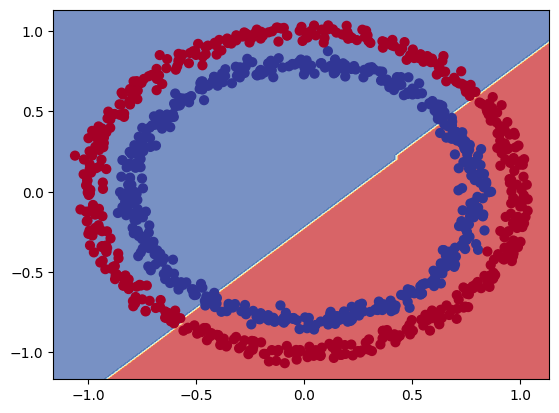

In [ ]:
plot_decision_boundary(model=model_3, x=x, y=y)

In [ ]:
# let's see if our model can be used for a rigression probelm.

tf.random.set_seed(42)

# Create a regression dataset
x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split the data into training and test set.
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


In [ ]:
# Re-create the model to fit the problem
tf.random.set_seed(42)

x_reg_train = np.reshape(x_reg_train, (x_reg_train.shape[0], 1))

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_3.fit(x_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 465.8092 - mae: 465.8092
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 345.2195 - mae: 345.2195
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 229.2729 - mae: 229.2729
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 109.2736 - mae: 109.2736
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 54.4629 - mae: 54.4629
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 86.7046 - mae: 86.7046
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 68.7742 - mae: 68.7742
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6147 - mae: 43.6147
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 49.0656 - mae: 49.0656
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 41.4804 - mae: 41.4804
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 6ms/step


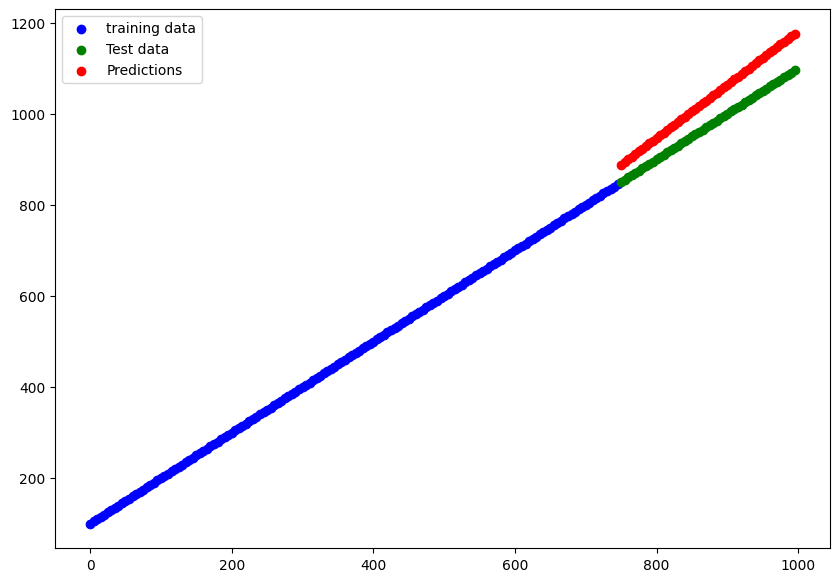

In [ ]:
# make Predictions with our trained model.
import matplotlib.pyplot as plt

y_reg_preds = model_3.predict(x_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c='b', label= "training data")
plt.scatter(x_reg_test, y_reg_test, c = 'g', label= 'Test data')
plt.scatter(x_reg_test, y_reg_preds, c='r', label= 'Predictions')
plt.legend()

In [ ]:
### The missing piece: Non-linearity

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
])

# Compile the model.
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# fit a historical model
history = model_4.fit(x, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.4170 - accuracy: 0.4710
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4014 - accuracy: 0.4700
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3893 - accuracy: 0.4720
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3598 - accuracy: 0.4710
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3104 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2449 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2303 - accuracy: 0.4710
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2260 - accuracy: 0.4710
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2029 - accuracy: 0.4720
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1670 - accuracy: 0.4720
Epoch 11/

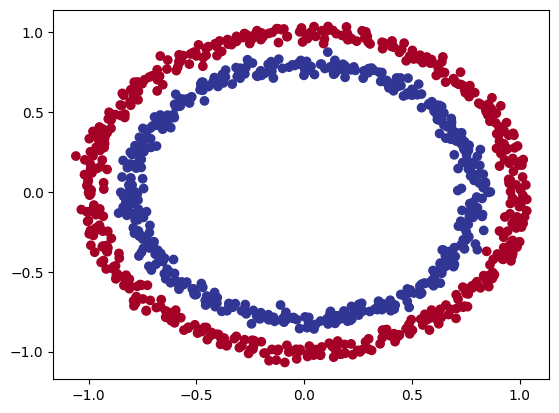

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c = y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing a binary classification


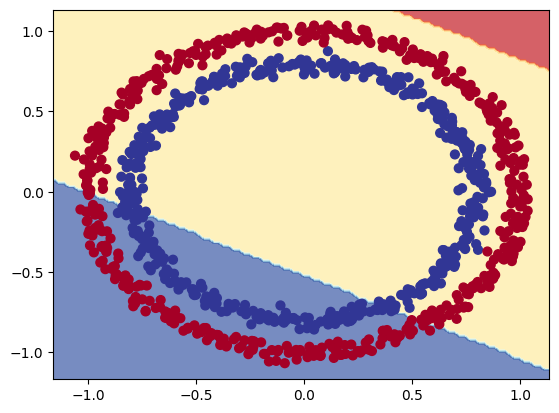

In [ ]:
# check the decision boundary
plot_decision_boundary(model_4, x=x, y=y)

In [ ]:
# split the data into training and testing set.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x_train)

800

In [ ]:
# create a random seed
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model.
model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(lr= 0.01),
                metrics=['accuracy'])

history = model_8.fit(x_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 5ms/step - loss: 0.6922 - accuracy: 0.4863
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5025
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5063
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5125
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5050
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.5075
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5487
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6731 - accuracy: 0.5625
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6692 - accuracy: 0.5638
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6643 - accuracy: 0.6562
Epoch 11/25
25/25 [

In [ ]:
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4611 - accuracy: 0.9500


[0.46107035875320435, 0.949999988079071]

313/313 [==============================] - 1s 2ms/step
doing a binary classification


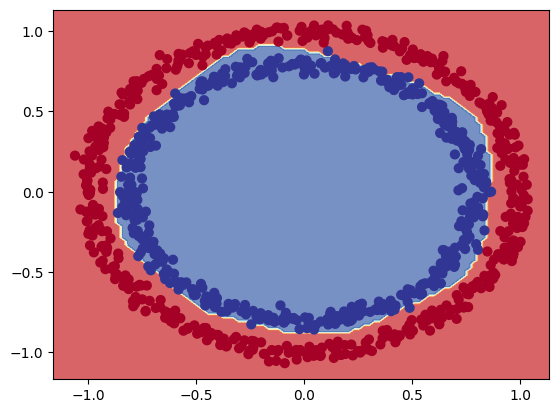

In [ ]:
plot_decision_boundary(model_8, x, y)

313/313 [==============================] - 1s 2ms/step
doing a binary classification
313/313 [==============================] - 1s 2ms/step
doing a binary classification


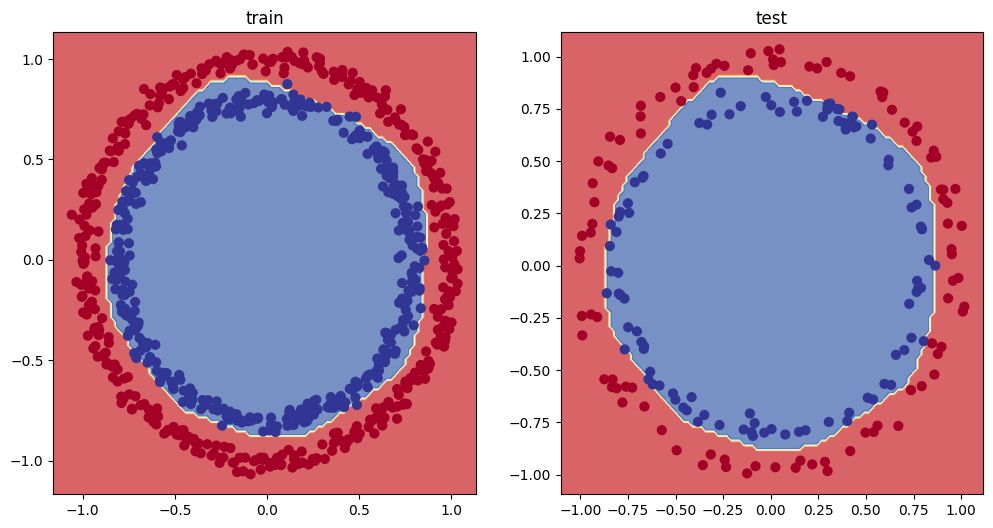

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('train')
plot_decision_boundary(model_8, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('test')
plot_decision_boundary(model_8, x=x_test, y=y_test)
plt.show()

In [ ]:
model_8.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 20)                60        
                                                                 
 dense_11 (Dense)            (None, 20)                420       
                                                                 
 dense_12 (Dense)            (None, 1)                 21        
                                                                 
Total params: 501 (1.96 KB)
Trainable params: 501 (1.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.692174,0.48625
1,0.689723,0.50250
2,0.687460,0.50625
3,0.686123,0.51250
4,0.683475,0.50500
5,0.680983,0.50750
6,0.677382,0.54875
7,0.673055,0.56250
8,0.669209,0.56375
9,0.664346,0.65625


Text(0.5, 1.0, 'Model_8 loss curve')

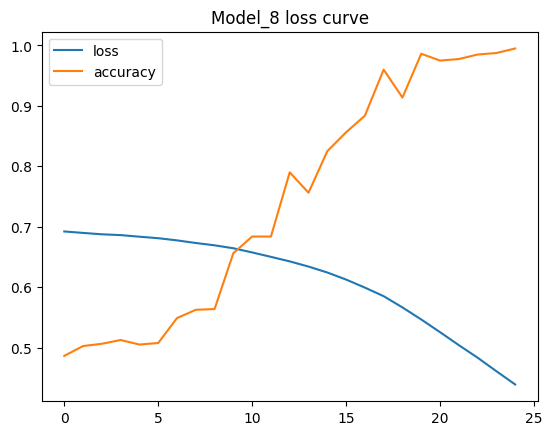

In [ ]:
 pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curve')

### FInding the best Learning rate.
* A learning rate **callback**
* modified loss vurves plot.

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_9.compile(loss = 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(lr = 0.01),
                metrics=['accuracy'])

# create a learining rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

# Fit the model(passing lr_scheduler callback)
history_9 = model_9.fit(x_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7222 - accuracy: 0.4975 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7208 - accuracy: 0.4963 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7192 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7175 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7160 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7143 - accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7127 - accuracy: 0.5013 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7111 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

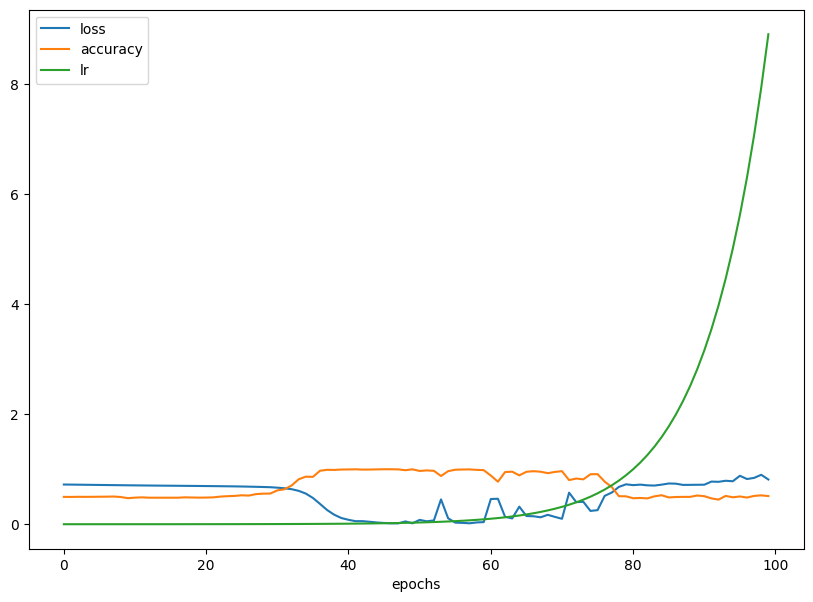

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel='epochs')

Text(0.5, 1.0, 'learning rate vs loss')

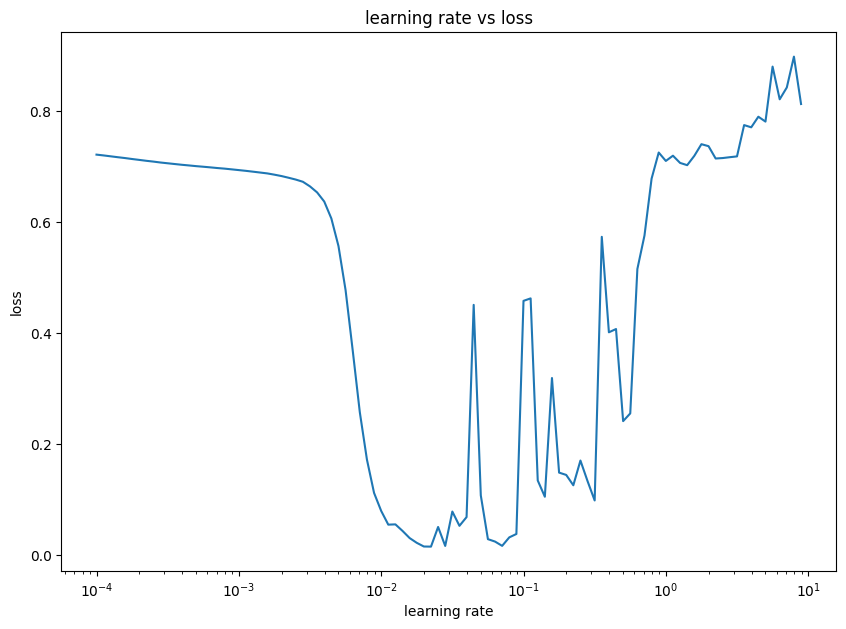

In [ ]:
# comapare the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title("learning rate vs loss")

In [ ]:
# us a higher learning rate for the model_9
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_10.compile(loss='binary_crossentropy',
                 optimizer= tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=['accuracy'])

model_10.fit(x_train, y_train, epochs=25, verbose=0)



In [ ]:
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0771 - accuracy: 0.9700


[0.07706557959318161, 0.9700000286102295]

In [ ]:
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4611 - accuracy: 0.9500


[0.46107035875320435, 0.949999988079071]

313/313 [==============================] - 0s 1ms/step
doing a binary classification
313/313 [==============================] - 0s 1ms/step
doing a binary classification


<function matplotlib.pyplot.show(close=None, block=None)>

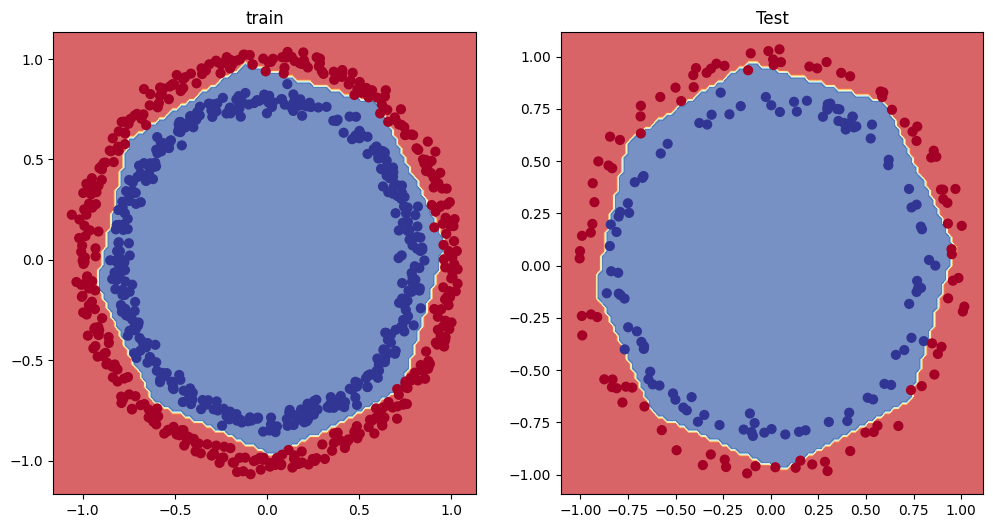

In [ ]:
# plot the decition boundary for model 10
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_10, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, x=x_test, y=y_test)
plt.show

## More classification evaluation methods.
Alongside visualizing our models results as mach as possible there are a handful of other classification evaluation methods that one need to be familiar with
* Accuracy
* precision
* Recall
* F1_score
* confusion metrix
* classification report from sklearn

In [ ]:
# Check the accuracy of out model
loss, accuracy = model_10.evaluate(x_test, y_test)
print(f'model loss on the test dataset: {loss}')
print(f'model accuracy on the test dataset: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.0771 - accuracy: 0.9700
model loss on the test dataset: 0.07706557959318161
model accuracy on the test dataset: 97.00%


In [ ]:
# Create a confusion metrix
from sklearn.metrics import confusion_matrix

# make Predictions "make sure to round the data to the nearest ones"
y_preds =tf.round(model_10.predict(x_test))

# Create a confusion matrix
confusion_matrix(y_test, y_preds)


7/7 [==============================] - 0s 2ms/step


array([[ 94,   6],
       [  0, 100]])

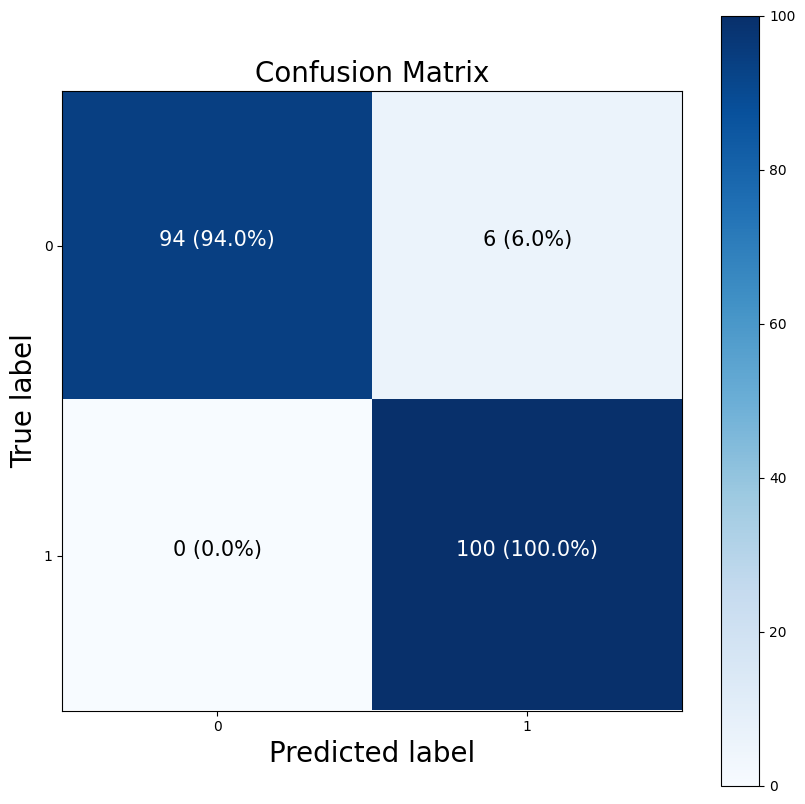

In [ ]:
## Plot the confusion mattrix by the use of sklearn plot_confusion metrics

import itertools

figsize = (10, 10)

cm = confusion_matrix(y_test, y_preds)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalise the matrix
n_classes = cm.shape[0]

# make the plot
fig , ax =plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# label the axes
ax.set(title='Confusion Matrix',
       xlabel='Predicted label',
       ylabel='True label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# set threshold for different colors
threshold = (cm.max() + cm.min()) /2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
           horizontalalignment='center',
           color='white' if cm[i, j] > threshold else 'black',
           size=15)


## Multiclass clasification
THis is when you have more than two classes as an option

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
print(f'Training sample: \n {train_data[0]}')
print(f'Training label: \n {train_labels[0]}')

Training sample: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

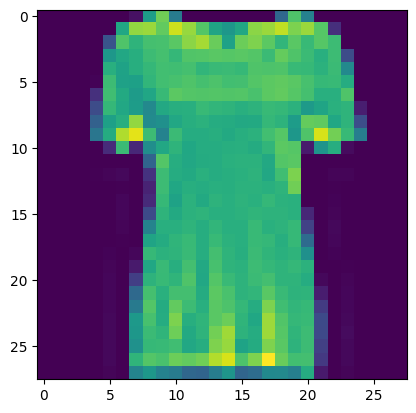

In [ ]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[10])

In [ ]:
train_labels[10]

0

In [ ]:
# Create a small list
class_names = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal',
              'shirt', 'sneaker', 'bag', 'ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'dress')

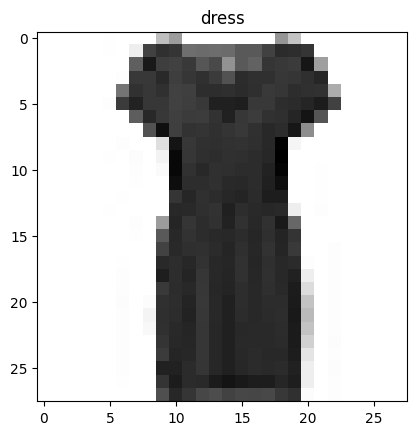

In [ ]:
plt.imshow(train_data[20], cmap=plt.cm.binary)
plt.title(class_names[train_labels[20]])

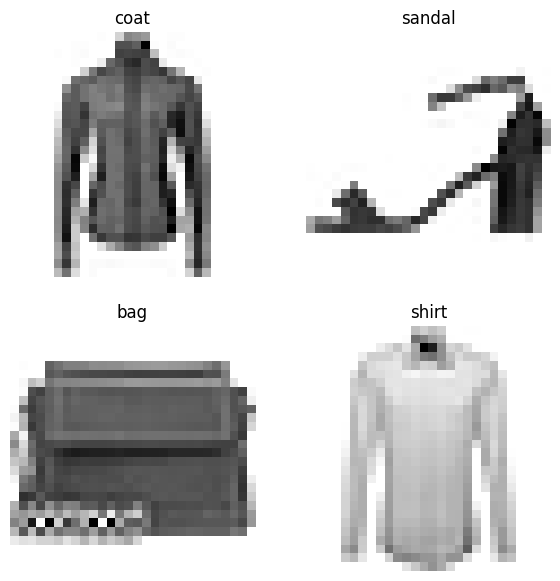

In [ ]:
# plot  multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

 ## BUilding a multiclass classification model
 * input shape = 28 * 28
 * output shape = 10 (one per class)
 * Loss function = tf.keras.losses.
 * for one_hot encoded labels use categoricalCrossentropy.
 * for the model suing numerical features use sparseCategoricalCrossentropy
 categoricalCrossentropy()

In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_11.compile(loss = 'categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.5220 - accuracy: 0.0991 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3030 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1001
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3008 - accuracy: 0.1015 - val_loss: 2.3010 - val_accuracy: 0.1011
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0147 - accuracy: 0.2110 - val_loss: 1.7285 - val_accuracy: 0.3075
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6396 - accuracy: 0.3190 - val_loss: 1.5825 - val_accuracy: 0.3331
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5505 - accuracy: 0.3356 - val_loss: 1.5323 - val_accuracy: 0.3454
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5147 - accuracy: 0.3431 - val_loss: 1.5126 - val_accuracy:

In [ ]:
model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Nomalization of the data
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0385 - accuracy: 0.6118 - val_loss: 0.6853 - val_accuracy: 0.7507
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6182 - accuracy: 0.7817 - val_loss: 0.6336 - val_accuracy: 0.7839
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5708 - accuracy: 0.8066 - val_loss: 0.5993 - val_accuracy: 0.7955
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5465 - accuracy: 0.8166 - val_loss: 0.5804 - val_accuracy: 0.8038
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5356 - accuracy: 0.8193 - val_loss: 0.5806 - val_accuracy: 0.8034
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5269 - accuracy: 0.8217 - val_loss: 0.5733 - val_accuracy: 0.8007
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5197 - accuracy: 0.8242 - val_loss: 0.5602 - val_accuracy:

🔑 **NOTE** Neural networks tend to prefer data in numerical form as well as scaled/normalized

<Axes: title={'center': 'Normalized data'}>

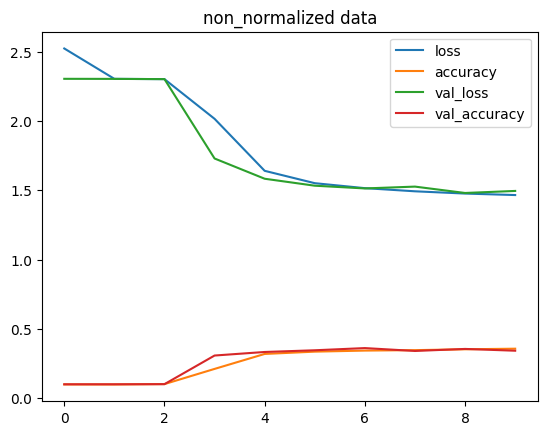

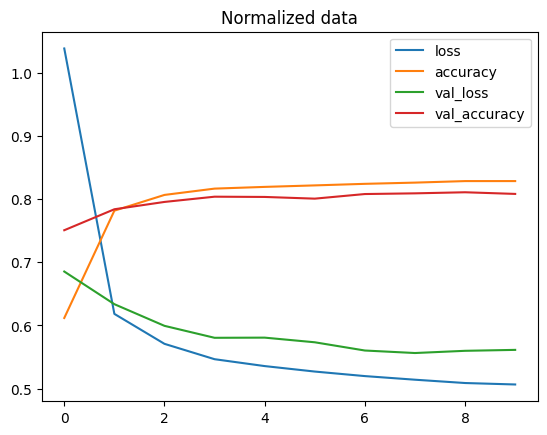

In [ ]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title='non_normalized data')
pd.DataFrame(norm_history.history).plot(title='Normalized data')

## Finding the ideal learining rate

In [ ]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_13.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4315 - accuracy: 0.4365 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9783 - accuracy: 0.6006 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7725 - accuracy: 0.7165 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6481 - accuracy: 0.7677 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6084 - accuracy: 0.7820 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5912 - accuracy: 0.7874 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5815 - accuracy: 0.7920 - lr: 0.0020
Epoch 8/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5741 - accuracy: 0.7938 - lr: 0.0022
Epoch 9/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5

Text(0.5, 1.0, 'Finding the ideal learning rate')

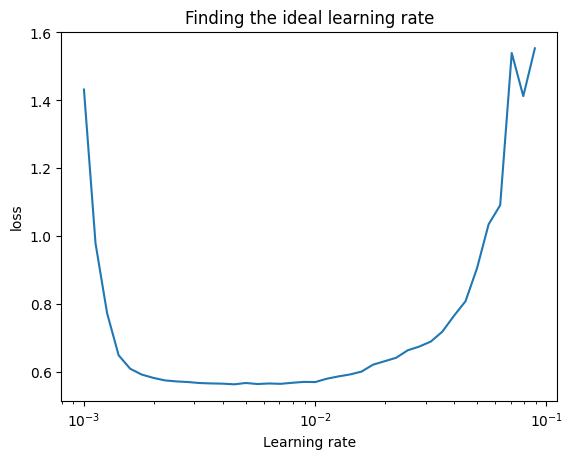

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('loss')
plt.title('Finding the ideal learning rate')

In [ ]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2948 - accuracy: 0.5894 - val_loss: 0.9003 - val_accuracy: 0.7172
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7801 - accuracy: 0.7504 - val_loss: 0.7536 - val_accuracy: 0.7564
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6859 - accuracy: 0.7707 - val_loss: 0.6871 - val_accuracy: 0.7645
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6475 - accuracy: 0.7793 - val_loss: 0.6621 - val_accuracy: 0.7735
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6277 - accuracy: 0.7853 - val_loss: 0.6758 - val_accuracy: 0.7699
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6137 - accuracy: 0.7879 - val_loss: 0.6562 - val_accuracy: 0.7766
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6045 - accuracy: 0.7905 - val_loss: 0.6603 - val_accuracy:

# Evaluation of the multiclass classification model.
* Use confusion matrix
* Assess the prediction by visualization.
* save and export it for use in an aplication.

In [ ]:
# create a confusion_matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalise the matrix
  n_classes = cm.shape[0]

  # make the plot
  fig , ax =plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # set labels to de classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(title='Confusion Matrix',
        xlabel='Predicted label',
        ylabel='True label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # set threshold for different colors
  threshold = (cm.max() + cm.min()) /2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
            horizontalalignment='center',
            color='white' if cm[i, j] > threshold else 'black',
            size=text_size)

In [ ]:
class_names

['t-shirt/top',
 'trouser',
 'pullover',
 'dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'ankle boot']

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# Make predictions
y_probs = model_14.predict(test_data_norm)

y_probs[:5]

313/313 [==============================] - 2s 5ms/step


array([[3.2253952e-03, 1.8278178e-04, 2.0394051e-03, 7.4914086e-04,
        1.9353403e-04, 1.1055199e-01, 1.3663409e-03, 2.9503044e-01,
        2.3316250e-03, 5.8432943e-01],
       [3.1737625e-05, 2.5067875e-12, 9.8316580e-01, 1.2371810e-07,
        7.1868780e-03, 6.4471290e-28, 9.2990305e-03, 3.3929734e-14,
        3.1620605e-04, 4.1546103e-38],
       [6.5805699e-07, 9.9601036e-01, 2.3452313e-07, 1.0707302e-03,
        4.0426879e-04, 4.7691163e-05, 5.1397083e-06, 2.4192032e-15,
        2.4608965e-03, 2.8211286e-21],
       [3.8114006e-08, 9.9880052e-01, 1.4953719e-09, 6.1384379e-04,
        9.0778858e-06, 4.3879062e-04, 1.2237587e-07, 4.6184548e-17,
        1.3781198e-04, 8.9039892e-20],
       [1.9037132e-01, 6.1808998e-05, 2.0536554e-01, 4.7157455e-02,
        4.9519096e-02, 1.3269621e-13, 5.0574064e-01, 7.1231729e-11,
        1.7842147e-03, 8.8039138e-19]], dtype=float32)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([3.2253952e-03, 1.8278178e-04, 2.0394051e-03, 7.4914086e-04,
        1.9353403e-04, 1.1055199e-01, 1.3663409e-03, 2.9503044e-01,
        2.3316250e-03, 5.8432943e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'ankle boot')

In [ ]:
# Convert all the prediction probabilities to integers
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 8, 2, 5, 7])

In [ ]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[708,   2,  34,  74,   6,   0, 159,   3,  13,   1],
       [  3, 937,   4,  28,  10,   5,   2,   0,  11,   0],
       [ 15,   1, 714,   9, 147,   1,  91,   1,  21,   0],
       [ 34,  19,  10, 785,  54,   7,  80,   0,  11,   0],
       [  0,   0, 143,  20, 744,   0,  64,   0,  29,   0],
       [  1,   0,   0,   0,   0, 876,   0,  74,  10,  39],
       [137,   1, 225,  33, 155,   1, 416,   1,  29,   2],
       [  0,   0,   0,   0,   0,  29,   0, 960,   0,  11],
       [  3,   0,  22,  13,  11,  14,  11,  12, 914,   0],
       [  1,   0,   0,   0,   0,  16,   0,  88,   0, 895]])

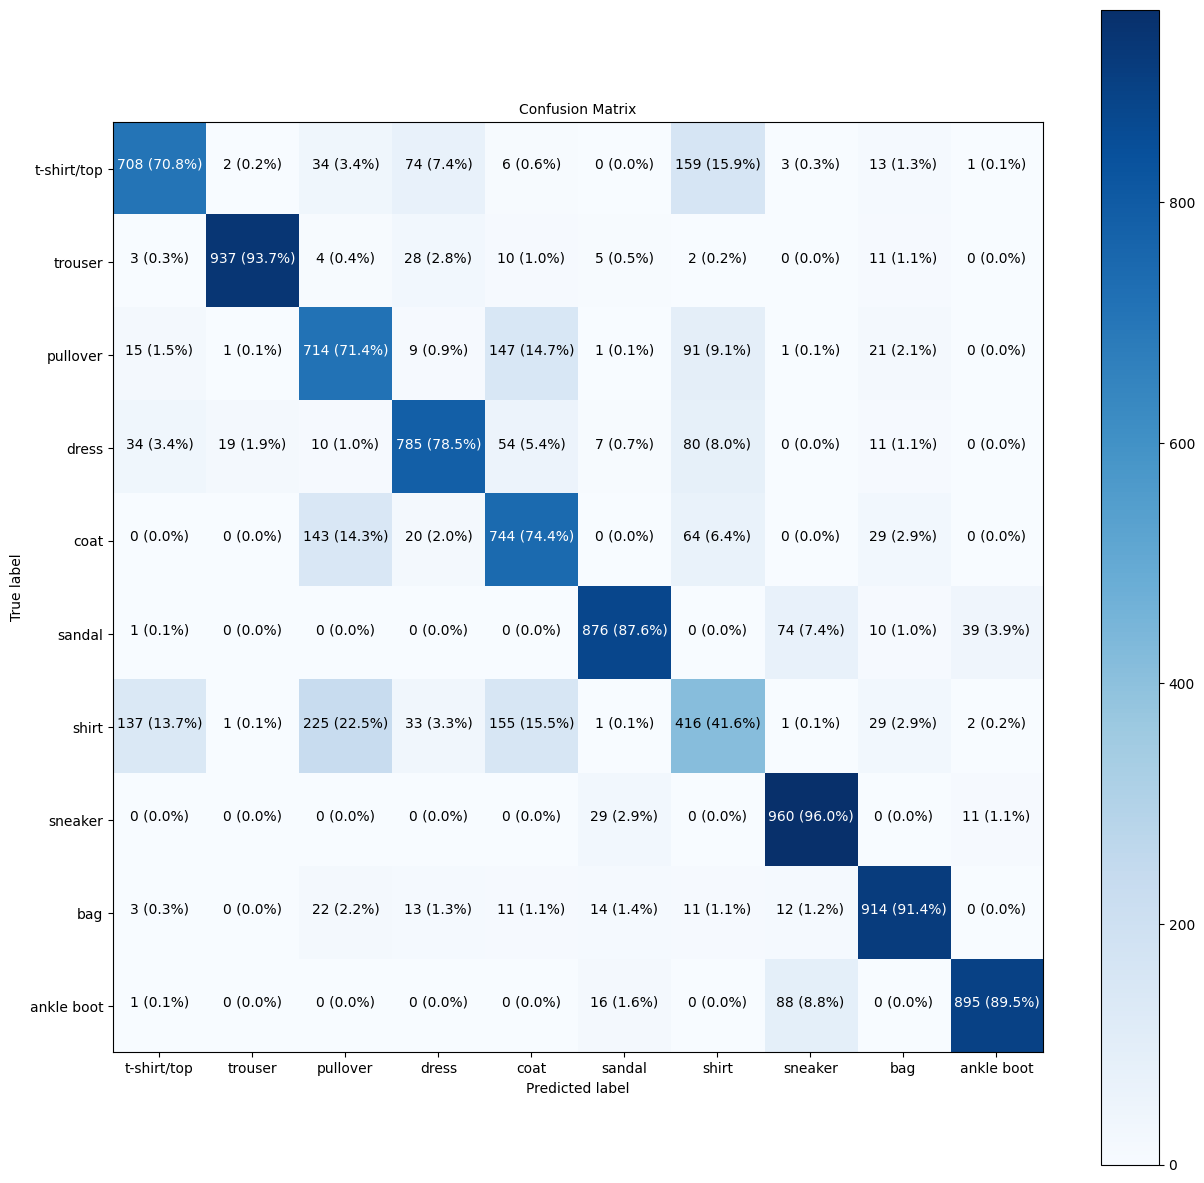

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

🔑**NOTE** Visualize as much as posible to develop a further understandin of the data and the inputs ans outputs of your models.

In [ ]:
import random
def plot_random_image(model, images, true_labels, classes):
  """
  picks a random image and plots it with predicion and truth label
  """
  i = random.randint(0, len(images))

  # create predictions and turgets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel('Pred: {} {:2.0f}% (true: {})'.format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 20ms/step


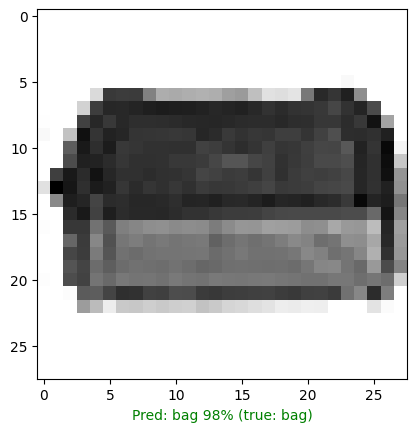

In [ ]:
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

In [ ]:
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the partterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# shapes
weights, weights.shape

(array([[ 1.0551105 , -0.48089278,  0.10703787, -0.7586551 ],
        [ 0.5148238 , -0.71733594, -0.53253573,  0.7781691 ],
        [ 1.3604468 , -0.1884177 , -1.1713253 , -0.22435352],
        ...,
        [ 0.14302003, -0.0278915 ,  0.08676289,  0.05653728],
        [ 0.31833425, -0.5385044 ,  0.1429563 ,  0.29505503],
        [ 0.73213255, -0.2562291 , -0.30660123,  0.10792319]],
       dtype=float32),
 (784, 4))

In [ ]:
biases, biases.shape

(array([ 0.4158027,  0.6002831,  1.2805192, -1.4726703], dtype=float32), (4,))

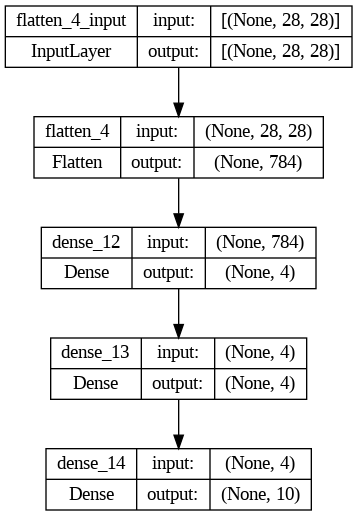

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_14, show_shapes=True)